# Leaderboard analysis

### Download leaderboard manually

Let's start downloading the leaderboard from Kaggle's website:

https://www.kaggle.com/c/nlp-getting-started/leaderboard

I downloaded the leaderboard manually and saved if in the 'input' folder as 'publicleaderboard.csv'.

### Import Python packages

For data exploration and processing we are using the following Python packages:
* Numpy (linear algebra)
* Pandas (data processing)
* Seaborn (data visualization)
* Matplotlib (data visualization)

In [1]:
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read leaderboard from CSV

Print out the first line of the file to see what fields it contains.

In [2]:
with open('input/publicleaderboard.csv') as f:
    print(next(f))

﻿TeamId,TeamName,SubmissionDate,Score



Read the CSV file.

In [3]:
# Read dataset
df = pd.read_csv('input/publicleaderboard.csv', encoding = 'ISO-8859-1')

## General overview

Taking a look at the first rows of the leaderboard.

In [4]:
df.head()

,TeamId,TeamName,SubmissionDate,Score
0,4152525,Yufeng Guo,2019-12-20 15:33:49,0.81083
1,4169548,Salomon Kabongo,2019-12-23 22:54:36,0.57055
2,4169594,Amr M. Kayid,2019-12-23 22:57:00,0.81083
3,4169658,Zhenlan,2019-12-23 23:10:24,0.77505
4,4169742,Search and Rescue,2019-12-23 23:21:51,0.57055


The leaderboard is not in order by score, and it has every score submitted by every single participant. Let's put it in order, group by 'TeamName' and keep just the highest and newest score by each participant.

In [5]:
df = df.sort_values(by=['Score', 'SubmissionDate'], axis=0, ascending=[False, True], inplace=False).groupby(['TeamName']).first()
df.head()

,TeamId,SubmissionDate,Score
TeamName,,,
Dhruv Mevada,4180673,2020-01-03 12:33:58,0.76993
Jisoo_keen,4273798,2020-01-20 17:46:38,0.77505
12Nine,4180909,2019-12-26 13:47:24,0.57055
@s@s@s,4233541,2020-01-14 14:41:26,1.00000
A. Lesniak,4172870,2019-12-29 10:46:07,0.83435


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8c0a8d780>]],
      dtype=object)

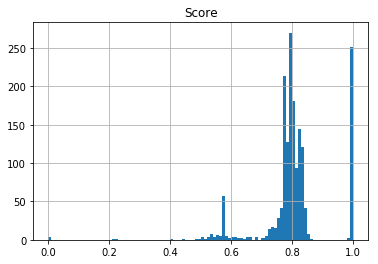

In [6]:
df.hist(column='Score', bins=100)

We can see the bulk of participants scored around 0.8.

There is a gap near 0.90 to almost 1.0 that corresponds to scores by "cheaters". This is a "Getting Started" competition, and the whole dataset is publicly available online, so we can expect the leaderboard to have plenty of cheaters that submit based on the actual dataset and not on prediction, or train their algorithm using the whole dataset (and then failing to predict just some outliers).

In [19]:
df = df.loc[df['Score'] <= 0.95] # Cleaning cheaters out

Show how I performed compared to my peers.

In [20]:
print('My score:', df.loc['Pablo Bacho', 'Score'])
print('Percentile:', '{0:.1f}'.format(df.loc[df['Score'] < df.loc['Pablo Bacho', 'Score']].count()['Score']/len(df)*100), '%')
print('Global average:', '{0:.5f}'.format(df['Score'].mean()))

My score: 0.81288
Percentile: 74.3 %
Global average: 0.77632
